<a href="https://colab.research.google.com/github/RoshanKumar854/DSE-Projects/blob/main/Trix_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the required libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the dataset

In [30]:
df = pd.read_csv('Data.csv')

#Defining Independent and Dependent Variables

In [31]:
x = df[['Runs','Avg','SR','4s','6s']]
y = df['Auction Price']

#Plotting Dependent variables with respect to different dependent variables

Text(0, 0.5, 'Auction Price')

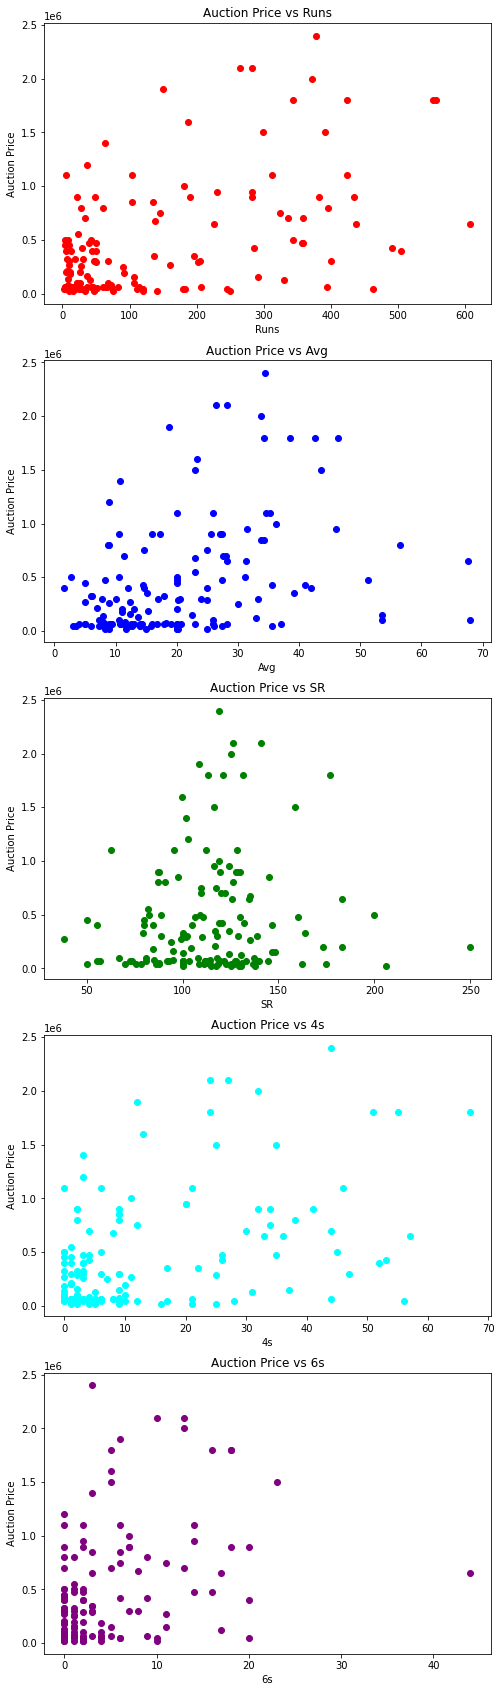

In [32]:
fig, axs = plt.subplots(5, 1,figsize=(8,30))
axs[0].scatter(x['Runs'],y,color='red')
axs[0].set_title('Auction Price vs Runs')
axs[0].set_xlabel('Runs')
axs[0].set_ylabel('Auction Price')

axs[1].scatter(x['Avg'],y,color='blue')
axs[1].set_title('Auction Price vs Avg')
axs[1].set_xlabel('Avg')
axs[1].set_ylabel('Auction Price')

axs[2].scatter(x['SR'],y,color='green')
axs[2].set_title('Auction Price vs SR')
axs[2].set_xlabel('SR')
axs[2].set_ylabel('Auction Price')

axs[3].scatter(x['4s'],y,color='cyan')
axs[3].set_title('Auction Price vs 4s')
axs[3].set_xlabel('4s')
axs[3].set_ylabel('Auction Price')

axs[4].scatter(x['6s'],y,color='purple')
axs[4].set_title('Auction Price vs 6s')
axs[4].set_xlabel('6s')
axs[4].set_ylabel('Auction Price')

In [33]:
fig.savefig('1.png')

#Calculating Multicollineaity among independent varaibles

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

  feature        VIF
0    Runs  67.335014
1     Avg   8.346457
2      SR   4.386158
3      4s  37.713889
4      6s   6.642025


#Getting OLS model by using required independent variables 

In [35]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Auction Price   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     14.35
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           2.14e-11
Time:                        13:11:54   Log-Likelihood:                -2159.1
No. Observations:                 150   AIC:                             4330.
Df Residuals:                     144   BIC:                             4348.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.122e+05   1.48e+05      1.433      0.154   -8.05e+04    5.05e+05
Runs        6754.8721   1505.877      4.486      0.000    3778.394    9731.351
Avg        -3445.2064   4262.920     -0.808      0.420   -1.19e+04    4980.775
SR           -23.4782   1342.264     -0.017      0.986   -2676.564    2629.607
4s         -3.616e+04   1.11e+04     -3.261      0.001   -5.81e+04   -1.42e+04
6s         -2.919e+04   1.28e+04     -2.285      0.024   -5.44e+04   -3941.839
==============================================================================
Omnibus:                       36.396   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.788
Skew:                           1.198   Prob(JB):                     1.04e-13
Kurtosis:                       4.956   Cond. No.                         913.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

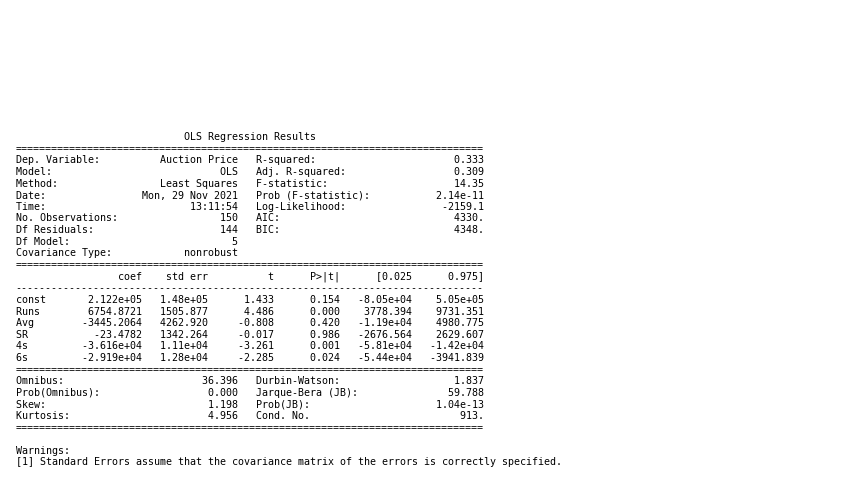

In [36]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

#Building our program for player numerology

In [37]:
from string import ascii_lowercase

In [38]:
def convertName(playerName):
    LETTERS = {letter: str(index) for index, letter in enumerate(ascii_lowercase, start=1)}
    
    def getSum(n):
        sum = 0
        for digit in str(n): 
            sum += int(digit)
        return sum
    
    def sumOfList(a):
        b=0
        for i in a:
            b=b+i
        return b


    def alphabet_position(text):
        text = text.lower()
        numbers = [int(LETTERS[character]) for character in text if character in LETTERS]
        return getSum(sumOfList(numbers))
    
    finalResult =alphabet_position(playerName)
    
    if(int(finalResult)>0):
        finalResult=getSum(finalResult)
    return finalResult

In [39]:
data=df['PLAYER']
a=np.vectorize(convertName)

In [40]:
a(data)

array([ 8,  8,  7,  5,  4,  6,  7,  6,  5,  5,  8,  9,  1,  1,  7,  4,  4,
        5,  4,  8,  1,  1,  3,  4,  2,  1,  8,  2,  1,  8,  1,  2,  6,  4,
        3,  4,  2,  8,  4,  4,  3,  3,  4,  1,  9,  7,  5,  9,  6,  2,  4,
        3,  3,  1,  5,  6,  3,  7,  6,  8,  3,  3,  7,  7,  3,  1,  8,  6,
        3,  1,  2,  2,  5,  6,  5,  6,  3,  9,  8,  5,  2,  7,  8,  1,  2,
        6,  1,  5,  4,  1,  2,  6,  6,  4,  5,  6,  7,  6,  8,  1,  4,  3,
        1,  3,  3,  4,  3,  1,  6,  7,  7,  9,  7,  2,  7,  4,  2,  7,  4,
        4, 10,  4,  5,  6,  7,  9,  4,  2,  9,  6,  8,  5,  6,  2,  9,  5,
        9,  6,  4,  7,  7,  3,  6,  7,  7,  5,  7,  3,  8,  2])

#Adding numerology column in our dataset

In [41]:
df['Player Number'] = a(data)

#Adding Player numerology in our independent variables set

In [42]:
x1=df[['Runs','Avg','SR','4s','6s','Player Number']]
y1=df['Auction Price']

#Building our model with player numerology

In [43]:
import statsmodels.api as sm
x1 = sm.add_constant(x1)
model1 = sm.OLS(y1, x1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Auction Price   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     12.12
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           5.49e-11
Time:                        13:11:54   Log-Likelihood:                -2158.6
No. Observations:                 150   AIC:                             4331.
Df Residuals:                     143   BIC:                             4352.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.297e+05    1.7e+05      0.762      0.447   -2.07e+05    4.66e+05
Runs           6886.5669   1511.977      4.555      0.000    3897.853    9875.281
Avg           -3506.0605   4263.838     -0.822      0.412   -1.19e+04    4922.235
SR               78.5695   1346.411      0.058      0.954   -2582.872    2740.011
4s            -3.706e+04   1.11e+04     -3.330      0.001   -5.91e+04   -1.51e+04
6s            -3.021e+04   1.28e+04     -2.357      0.020   -5.55e+04   -4876.530
Player Number  1.462e+04   1.49e+04      0.984      0.327   -1.47e+04     4.4e+04
==============================================================================
Omnibus:                       35.307   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.477
Skew:                           1.181   Prob(JB):                     5.45e-13
Kurtosis:                       4.860   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

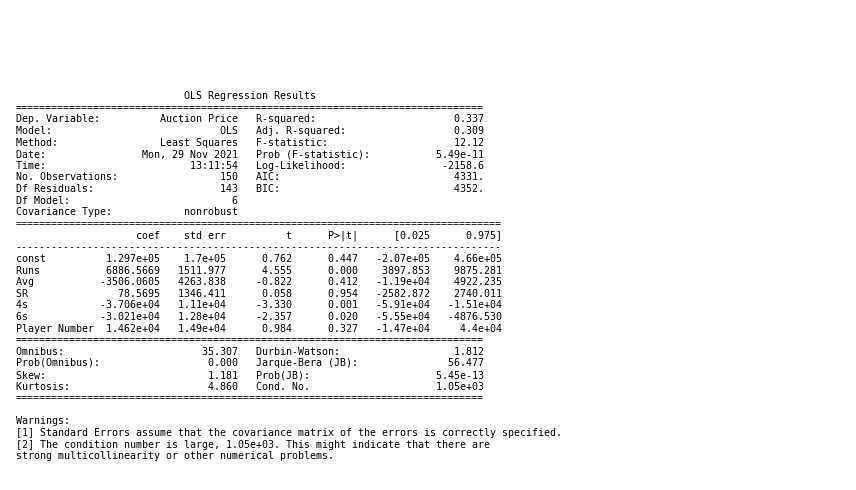

In [44]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model1.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('output1.png')

In [45]:
y1pred = model1.predict(x1)

#Plotting player numerology vs Auction price

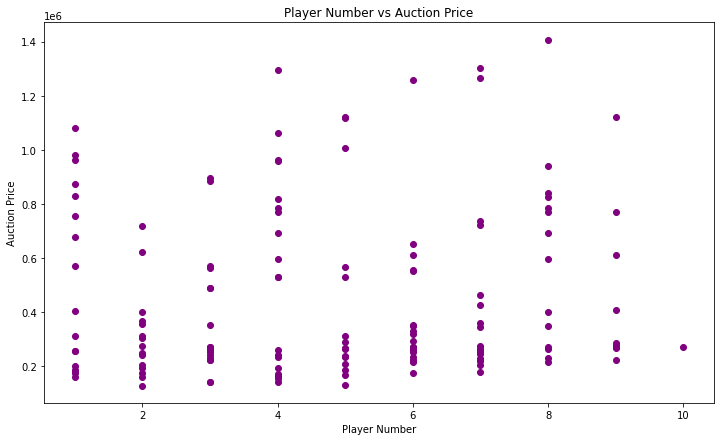

In [46]:
fig1, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis    
ax.scatter(x1['Player Number'],y1pred,color='purple')
ax.set_title('Player Number vs Auction Price')
ax.set_xlabel('Player Number')
ax.set_ylabel('Auction Price')

fig1.show()

In [47]:
fig1.savefig('2.png')